In [34]:
# Read MNIST data
import pandas as pd
import numpy as np
import time
from sklearn.manifold import TSNE
import seaborn as sns

data = pd.read_csv('MNIST_100.csv')

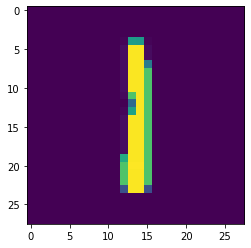

In [36]:
# make two variables - X and y
y = data.iloc[:, 0]
X = data.drop('label', axis=1)

# display the first image
import matplotlib.pyplot as plt
img = np.array(X[0:1]).reshape(28, 28) / 255
plt.imshow(img)
plt.show()

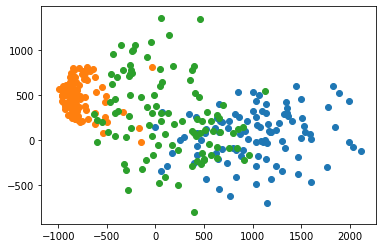

In [37]:
# Task 1: Visualize the MNIST data using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
PCAX = pca.transform(X)

plt.scatter(PCAX[0:100, 0], PCAX[0:100, 1]) # Digit 0
plt.scatter(PCAX[100:200, 0], PCAX[100:200, 1]) # Digit 1
plt.show()

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.022s...
[t-SNE] Computed neighbors for 1000 samples in 0.999s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 545.331722
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 79.5437012, gradient norm = 0.3286518 (50 iterations in 0.084s)
[t-SNE] Iteration 100: error = 77.3276825, gradient norm = 0.3306310 (50 iterations in 0.103s)
[t-SNE] Iteration 150: error = 76.8218689, gradient norm = 0.3269780 (50 iterations in 0.104s)
[t-SNE] Iteration 200: error = 77.1401825, gradient norm = 0.3288642 (50 iterations in 0.084s)
[t-SNE] Iteration 250: error = 76.5832977, gradient norm = 0.3254425 (50 iterations in 0.094s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.583298
[t-SNE] Iteration 300: error = 1.3738627, gradient norm = 0.0013559 (50 iterations in 0.069s)
[t-SNE] Iteration 350: error = 1.2084620, gradient norm = 0.000

/Users/mamun/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

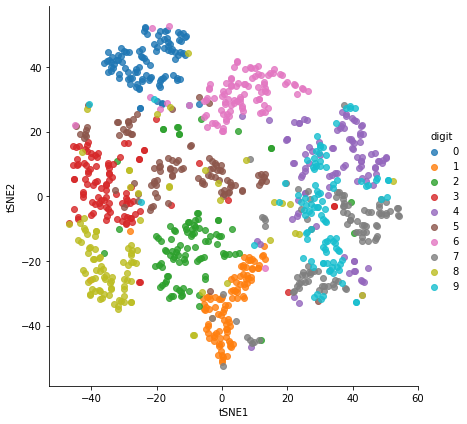

In [31]:
#Task 2: Visualize the MNIST data using t-SNE library. 

label = ["0","1","2","3","4","5","6","7","8","9"]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=2, perplexity=15, n_iter=600)

# initialization and fitting the TSNE
tsne_results = tsne.fit_transform(X)
df_t = pd.DataFrame(data=tsne_results, columns=['tSNE1','tSNE2'])

# Creating the legend
j=0
for i in label:
    y=y.replace(j, i)
    j+=1

df_t['digit'] = y
fig = plt.figure()
fig = sns.lmplot(x='tSNE1', y='tSNE2', data=df_t, hue='digit', fit_reg=False, legend=1, size=6)

In [48]:
df = pd.read_csv('tips.csv')
# df = pd.read_csv('housing_training.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


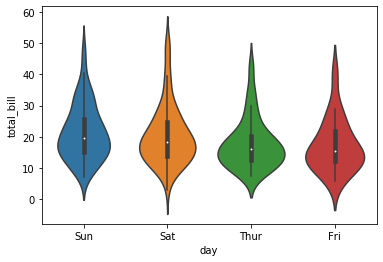

In [49]:
# Task 3: Visualize the housing data using violin plot
ax = sns.violinplot(x="day", y="total_bill", data=df)
# ax = sns.violinplot(x=df["c9"], y=df["c10"])